In [1]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Import the SVM model
from sklearn import svm
from sklearn.metrics import classification_report

In [2]:
trades_csv = ("mytradesNov_Dec.csv")

trades_df = pd.read_csv(trades_csv)

trades_df.head()

,User_Id,Time,Category,Operation,Order_Id,Transaction_Id,Primary_Asset,Realized_Amount_For_Primary_Asset,Realized_Amount_For_Primary_Asset_In_USD_Value,Base_Asset,...,Realized_Amount_For_Base_Asset_In_USD_Value,Quote_Asset,Realized_Amount_For_Quote_Asset,Realized_Amount_For_Quote_Asset_In_USD_Value,Fee_Asset,Realized_Amount_For_Fee_Asset,Realized_Amount_For_Fee_Asset_In_USD_Value,Payment_Method,Withdrawal_Method,Additional_Note
0,58864280,2023-11-15 17:16:12,Spot Trading,Buy,1105524034,2305996601,NaN,NaN,NaN,BTC,...,5.303282,USDT,5.093784,5.097706,BNB,0.0,0.0,Wallet,NaN,NaN
1,58864280,2023-11-15 17:17:35,Spot Trading,Buy,1105524717,2305997936,NaN,NaN,NaN,BTC,...,5.303282,USDT,5.096305,5.100230,BNB,0.0,0.0,Wallet,NaN,NaN
2,58864280,2023-11-15 17:31:32,Spot Trading,Sell,1105524068,2305999316,NaN,NaN,NaN,BTC,...,5.303282,USDT,5.098884,5.102810,BNB,0.0,0.0,Wallet,NaN,NaN
3,58864280,2023-11-15 17:41:17,Spot Trading,Sell,1105524741,2306001696,NaN,NaN,NaN,BTC,...,5.303282,USDT,5.101404,5.105332,BNB,0.0,0.0,Wallet,NaN,NaN
4,58864280,2023-11-15 19:05:10,Spot Trading,Sell,1101889953,2306026915,NaN,NaN,NaN,BTC,...,10.227757,USDT,10.101105,10.108883,BNB,0.0,0.0,Wallet,NaN,NaN


In [3]:
trades_df_operation = trades_df['Operation']

trades_df_operation.head()

0     Buy
1     Buy
2    Sell
3    Sell
4    Sell
Name: Operation, dtype: object

In [4]:
buy = 0
sell = 0
for trade in trades_df_operation:
    if trade == 'Buy':
        buy+=1
    else: 
        sell+=1

In [5]:
print(buy)
print(sell)

2158
2215


In [6]:
# columns_to_select =
trade_buy_total_asset = trades_df[['Time','Operation', 'Realized_Amount_For_Base_Asset', 'Realized_Amount_For_Base_Asset_In_USD_Value']]
trade_buy_total_asset['Time'] = pd.to_datetime(trade_buy_total_asset['Time'])
trade_buy_total_asset = trade_buy_total_asset.set_index('Time')
trade_buy_total_asset.head()

C:\Users\Name\AppData\Local\Temp\ipykernel_7664\626598773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_buy_total_asset['Time'] = pd.to_datetime(trade_buy_total_asset['Time'])


,Operation,Realized_Amount_For_Base_Asset,Realized_Amount_For_Base_Asset_In_USD_Value
Time,,,
2023-11-15 17:16:12,Buy,0.00014,5.303282
2023-11-15 17:17:35,Buy,0.00014,5.303282
2023-11-15 17:31:32,Sell,0.00014,5.303282
2023-11-15 17:41:17,Sell,0.00014,5.303282
2023-11-15 19:05:10,Sell,0.00027,10.227757


In [7]:
# Sort the DataFrame by time
trade_buy_total_asset = trade_buy_total_asset.sort_values(by='Time')

Total Realized Amount: 7053.572247029993


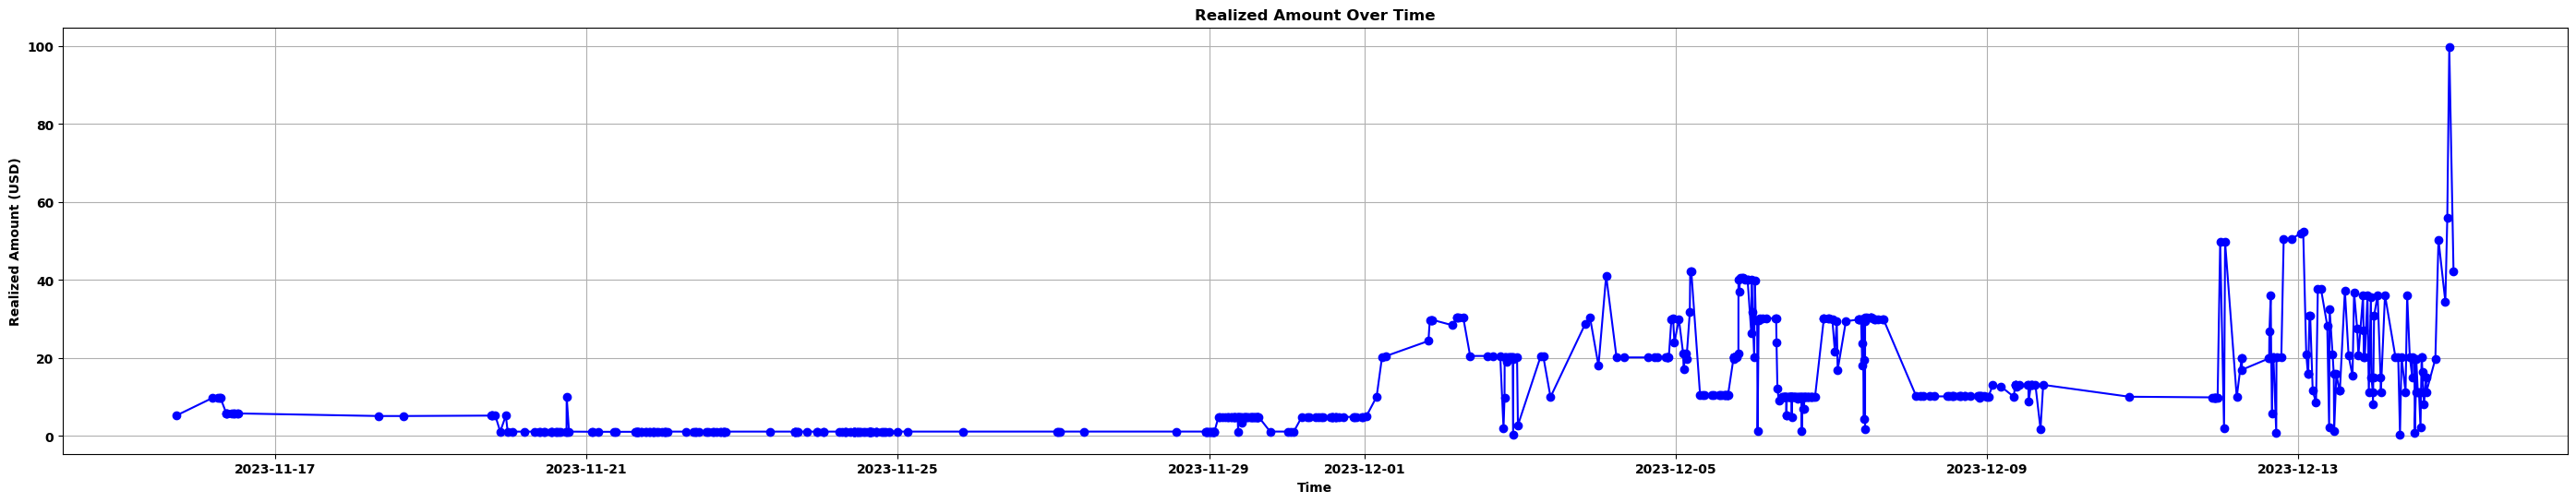

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming trade_buy_total_asset is your DataFrame
total_realized_amount = 0
previous_buy_time = None
total_time_difference = pd.Timedelta(0)

time_diff_data = {'Time': [], 'Realized_Amount': []}

for idx, row in trade_buy_total_asset.iterrows():
    if row['Operation'] == 'Buy':
        previous_buy_time = idx
    elif row['Operation'] == 'Sell' and previous_buy_time is not None:
        time_difference = idx - previous_buy_time
        # print(f'Time Difference: {time_difference}, Realized Amount: {row["Realized_Amount_For_Base_Asset_In_USD_Value"]}')
        total_realized_amount += row['Realized_Amount_For_Base_Asset_In_USD_Value']
        total_time_difference += time_difference
        
        # Append data for plotting
        time_diff_data['Time'].append(idx)
        time_diff_data['Realized_Amount'].append(row['Realized_Amount_For_Base_Asset_In_USD_Value'])

        previous_buy_time = None

print(f'Total Realized Amount: {total_realized_amount}')

# Plotting
plt.figure(figsize=(35, 6))
plt.plot(time_diff_data['Time'], time_diff_data['Realized_Amount'], marker='o', linestyle='-', color='b')
plt.title('Realized Amount Over Time')
plt.xlabel('Time')
plt.ylabel('Realized Amount (USD)')
plt.grid(True)
plt.show()


In [10]:
if len(trade_buy_total_asset) > 1:
    avg_time_difference = total_time_difference / (len(trade_buy_total_asset) - 1)
    print(f'Average Time Difference: {avg_time_difference}')
else:
    print('Not enough data to calculate average time difference.')

Average Time Difference: 0 days 00:01:28.623741994
